In [1]:
print("Model Selection and Evaluation !!")

Model Selection and Evaluation !!


### 1. Cross Validation
- Simple models underfit.
- Accuracy for training data & validation data is not much different.
- But, accurcy ain't that great.
- This situation is of low variance & high bias
- On moving towards complex models, accuracy improves.
- But, gap between accuracy on training data & validation data increases
- This situation is of high variance & low bias
- We need to compare across models to find the best model.
- We need to compare across all hyper-parameters for a particular model.
- The data that is used for training should not be used for validation.
- The validation accuracy is the one that we claims

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn.datasets import load_digits

In [23]:
digits = load_digits()

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

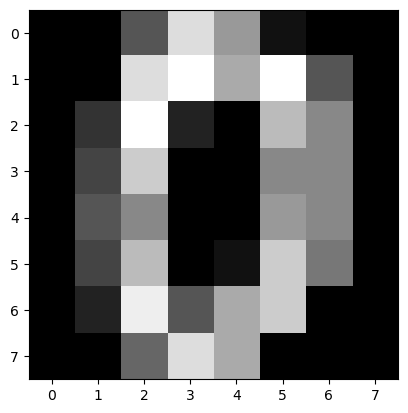

In [25]:
plt.imshow(digits.images[0],cmap='gray')
plt.show()

In [26]:
dt = DecisionTreeClassifier(max_depth=10)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [29]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(max_depth=10)

In [30]:
dt.score(testX,testY)

0.8511111111111112

In [31]:
dt.score(trainX,trainY)

0.9821826280623608

#### - Decreasing the complexity of model

In [32]:
dt = DecisionTreeClassifier(max_depth=7)

In [33]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(max_depth=7)

In [34]:
dt.score(testX,testY)

0.82

In [35]:
dt.score(trainX,trainY)

0.8856718634001485

##### Observation : With decrease in complexity the gap in training & validation accuracy also decreased

#### Cross Validation API
- Splits data into k parts.
- Use k - 1 parts for training the model
- Use kth part for validation
- Repeat the above steps multiple times to get a genralized behaviour

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
scores = cross_val_score(dt, digits.data, digits.target)

In [44]:
scores.mean()

0.7418368926029093

#### Cross-validate Function : Scores for multiple matrices

In [39]:
from sklearn.model_selection import cross_validate

In [40]:
scoring = ['precision_macro', 'recall_macro', 'accuracy']

In [41]:
cross_validate(dt, digits.data, digits.target, scoring=scoring, cv=5)

{'fit_time': array([0.01998878, 0.01600456, 0.01900125, 0.01799965, 0.0170002 ]),
 'score_time': array([0.14222765, 0.00799966, 0.00699782, 0.00900006, 0.00700092]),
 'test_precision_macro': array([0.76669623, 0.70161034, 0.78050181, 0.78913064, 0.77884105]),
 'test_recall_macro': array([0.758432  , 0.65594595, 0.77035544, 0.77023166, 0.76279065]),
 'test_accuracy': array([0.75833333, 0.65555556, 0.77158774, 0.77158774, 0.76044568])}


#### Stratification for dealing with imbalanced Classes
- StratifiedKFold
- Class frequencies are preserved in data splitting

In [45]:
import numpy as np

In [46]:
Y = np.append(np.ones(12),np.zeros(6))

In [47]:
X = np.ones((18,3))

In [48]:
from sklearn.model_selection import StratifiedKFold

In [49]:
skf = StratifiedKFold(n_splits=3)

In [50]:
list(skf.split(X,Y))

[(array([ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]),
  array([ 0,  1,  2,  3, 12, 13])),
 (array([ 0,  1,  2,  3,  8,  9, 10, 11, 12, 13, 16, 17]),
  array([ 4,  5,  6,  7, 14, 15])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 13, 14, 15]),
  array([ 8,  9, 10, 11, 16, 17]))]

In [51]:
Y[[ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]]

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])


### 2. Hyperparameter Tuning
- Model parameters are learnt by learning algorithms based on data
- Hyper-parameters needs to be configured
- Hyper-parameters are data dependent & many times need experiments to find the best
- sklearn provides GridSerach for finding the best hyper-parameters
#### Exhaustive GridSearch
- Searches sequentially for all the configued params
- For all possible combinations

In [52]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [53]:
dt = DecisionTreeClassifier()

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
grid_search = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5)}, cv=5)

In [56]:
grid_search.fit(digits.data,digits.target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 30, 5)})

In [57]:
grid_search.best_params_

{'max_depth': 20}

In [58]:
grid_search.best_score_

0.789124110182606

In [59]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20)

#### RandomizedSearch
- Unlike GridSearch, not all parameters are tried & tested
- But rather a fixed number of parameter settings is sampled from the specified distributions.
- Comparing GridSearch and RandomSearchCV

In [61]:

from time import time

#randint is an intertor for generating numbers between range specified
from scipy.stats import randint

In [62]:
X = digits.data
Y = digits.target

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [64]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": randint(1,11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [65]:
param_dist

{'max_depth': [3, None],
 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x1fd908254c0>,
 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x1fd90688e60>,
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

In [66]:
rf = RandomForestClassifier(n_estimators=20)

In [67]:
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X, Y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 9.43 seconds for 20 candidates parameter settings.


In [68]:
random_search.best_score_

0.9321231816774993

In [69]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X, Y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

GridSearchCV took 28.52 seconds for 72 candidate parameter settings.


In [70]:
grid_search.best_score_

0.9343546889507893

- GridSearch & RandomizedSearch can fine tune hyper-parameters of transformers as well when part of pipeline


### 3. Model Evaluation
-- Three different ways to evaluate quality of model prediction
- Score method of estimators, a default method is configured .i.e r2_score for regression, accuracy for classification
- Model evalutaion tools like cross_validate or cross_val_score also returns accuracy
- Metrices module is rich with various prediction error calculation techniques

In [71]:
trainX, testX, trainY, testY = train_test_split(X,Y)

In [72]:
rf.fit(trainX, trainY)

RandomForestClassifier(n_estimators=20)

- Technique 1 - Using score function

In [73]:
rf.score(testX,testY)

0.9644444444444444

- Technique 2 - Using cross_val_score as discussed above

In [74]:
cross_val_score(rf,X,Y,cv=5)

array([0.90555556, 0.90555556, 0.94986072, 0.95264624, 0.91364903])

#### Cancer prediction sample for understanding metrices

In [75]:
from sklearn.datasets import load_breast_cancer

In [76]:
dt = DecisionTreeClassifier()

In [77]:
cancer_data = load_breast_cancer()

In [78]:
trainX, testX, trainY, testY = train_test_split(cancer_data.data, cancer_data.target)

In [79]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [80]:
pred = dt.predict(testX)


#### Technique 3 - Using metrices
- Classfication metrices
- Accuracy Score - Correct classification vs ( Correct classification + Incorrect Classification)

In [81]:
from sklearn import metrics

In [82]:
metrics.accuracy_score(y_pred=pred, y_true=testY)

0.9370629370629371

-- Confusion Matrix - Shows details of classification inclusing TP,FP,TN,FN
- True Positive (TP), Actual class is 1 & prediction is also 1
- True Negative (TN), Actual class is 0 & prediction is also 0
- False Positive (FP), Acutal class is 0 & prediction is 1
- False Negative (FN), Actual class is 1 & prediction is 0

In [83]:
metrics.confusion_matrix(y_pred=pred, y_true=testY, labels=[0,1])

array([[50,  3],
       [ 6, 84]], dtype=int64)

-- Precision Score
- Ability of a classifier not to label positive if the sample is negative
- Claculated as TP/(TP+FP)
- We don't want a non-spam mail to be marked as spam

In [84]:
metrics.precision_score(y_pred=pred, y_true=testY)

0.9655172413793104

-- Recall Score
- Ability of classifier to find all positive samples
- It's ok to predict patient tumor to be cancer so that it undergoes more test
- But it is not ok to miss a cancer patient without further analysis

In [86]:
metrics.recall_score(y_pred=pred, y_true=testY)

0.9333333333333333

-- F1 score
- Weighted average of precision & recall

In [88]:
metrics.f1_score(y_pred=pred, y_true=testY)

0.9491525423728814

#### ROC & AUC

- House Price Prediction - Understanding matrices

In [91]:
from sklearn.datasets import fetch_california_housing 

In [93]:
#house_data = california_housing.fetch_california_housing()

house_data = fetch_california_housing(as_frame=True)

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()

In [96]:
lr.fit(house_data.data, house_data.target)

LinearRegression()

In [97]:
pred = lr.predict(house_data.data)

#### Matrices for Regression
-- mean squared error
- Sum of squares of difference between expected value & actual value

In [98]:
metrics.mean_squared_error(y_pred=pred, y_true=house_data.target)

0.5243209861846071

-- mean absolute error
- Sum of abs of difference between expected value & actual valu

In [100]:
metrics.mean_absolute_error(y_pred=pred, y_true=house_data.target)

0.5311643817546474

-- r2 score
- Returns accuracy of model in the scale of 0 & 1
- It measures goodness of fit for regression models
- Calculated as = (variance explained by the model)/(Total variance)
- High r2 means target is close to prediction

In [101]:
metrics.r2_score(y_pred=pred, y_true=house_data.target)

0.6062326851998051

##### Metrices for Clustering
- Two forms of evaluation
- supervised, which uses a ground truth class values for each sample
i) completeness_score
ii) homogeneity_score
- unsupervised, which measures the quality of model itself
i) silhoutte_score
ii) calinski_harabaz_score


#### completeness_score
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [102]:
from sklearn.metrics.cluster import completeness_score

In [103]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

- The acuracy is 1.0 because all the data belonging to same class belongs to same cluster

In [104]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

- The accuracy is .3 because class 1 - [11,22,11], class 2 - [22]

In [105]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


#### homogeneity_score
- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [106]:
from sklearn.metrics.cluster import homogeneity_score

In [107]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [108]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [109]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

- Same class data is broken into two clusters

#### silhoutte_score
- The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
- The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.
- Selecting the number of clusters with silhouette analysis on KMeans clustering

In [110]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

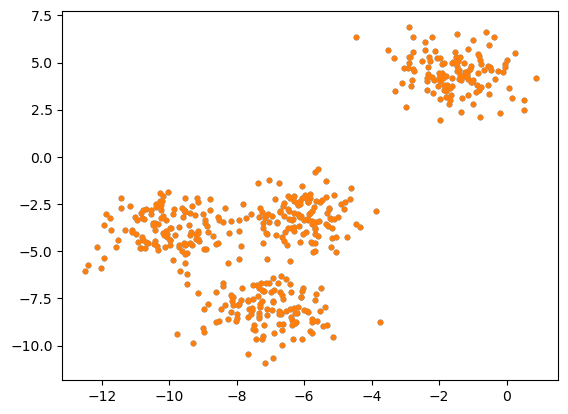

In [112]:
plt.scatter(X[:,0],X[:,1],s=10)
plt.show()

In [113]:
range_n_clusters = [2, 3, 4, 5, 6]

In [114]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [115]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))

2 0.7049787496083261
3 0.5882004012129721
4 0.6505186632729437
5 0.5433481058914456
6 0.4427616022488244


- The best number of clusters is 2
#### calinski_harabaz_score
- The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [119]:

#from sklearn.metrics import calinski_harabaz_score wrong
from sklearn.metrics import calinski_harabasz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabasz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2202.0290421721215
6 1961.0783160103947



### 4. Model Persistance
- Model training is an expensive process
- It is desireable to save the model for future reuse
- using pickle & joblib this can be achieved

In [120]:
import pickle

In [121]:
s = pickle.dumps(dt)

In [122]:
pickle.loads(s)

DecisionTreeClassifier()

In [123]:
type(s)

bytes


- joblib is better extension of pickle
- Doesn't convert into string

In [125]:
!pip install joblib


In [127]:
#from sklearn.externals import joblib

import joblib
from sklearn.tree import DecisionTreeClassifier

In [128]:
joblib.dump(dt, 'dt.joblib')

['dt.joblib']

- Loading the file back into model

In [129]:
dt = joblib.load('dt.joblib')

In [130]:
dt

DecisionTreeClassifier()


### 5. Validation Curves
- To validate a model, we need a scoring function.
- Create a grid of possible hyper-prameter configuration.
- Select the hyper-parameter which gives the best score

In [131]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 50, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             digits.data, 
                                             digits.target, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

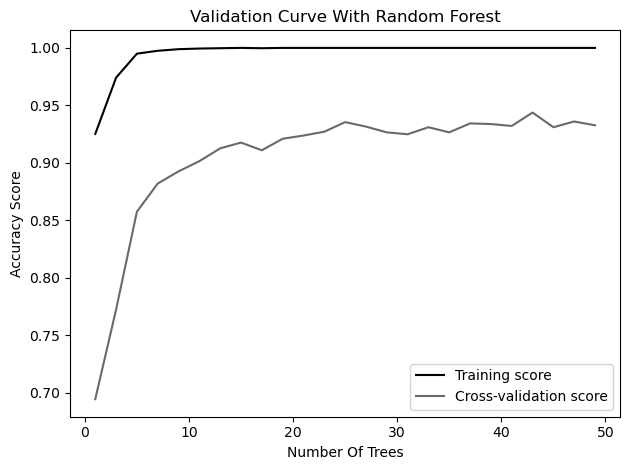

In [132]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### 6. Learning Curves
- Learning curves shows variation in training & validation score on increasing the number of samples

In [133]:
from sklearn.model_selection import learning_curve

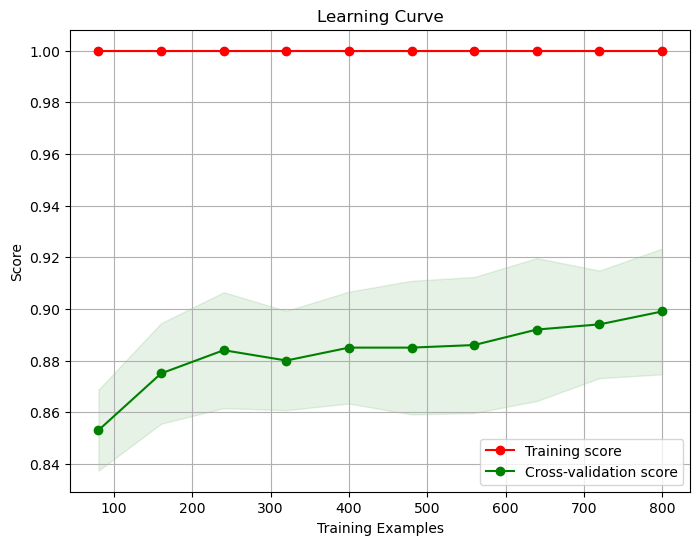

In [136]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Create learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.grid()

# Training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Validation scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Labels and title
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()
